# Pima Indians Diabetes Data Set数据探索

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 
0列为pregnants(怀孕次数)；
1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)；
2列为blood_pressure(舒张压,单位:mm Hg）
3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm）
4列为serum_insulin(餐后血清胰岛素,单位:mm）
5列为BMI,体重指数（体重（公斤）/ 身高（米）^2）
6列为Diabetes_pedigree_function(糖尿病家系作用)
7列为Age(年龄)
8列为Target(分类变量,0或1）
 
数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:)
https://www.kaggle.com/c/pf2012-diabetes

## 1. import 工具包

In [6]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 2. 读取数据

In [7]:
train = pd.read_csv("pima-indians-diabetes.csv")
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


检查数据规模
读取测试数据

In [8]:
print("Train :", train.shape)

Train : (768, 9)


In [9]:
#查看数据基本信息
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [10]:
#查看数值型特征的基本统计量
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


从结果中我们可以看到很多列的最小值为0。而在一些特定列代表的变量中，0值并没有意义，这就表名该值无效或为缺失值。

具体来说，下列变量的最小值为0时数据无意义：
1、血浆葡萄糖浓度
2、舒张压
3、肱三头肌皮褶厚度
4、餐后血清胰岛素
5、体重指数

In [11]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
print((train[NaN_col_names] == 0).sum())

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64


第1、2、5列中0值较少；相比较而言，第3、4列中的0值多出数倍，接近总量的一半。
为了确保有足够的数据量来训练模型，针对不同的列需要有不同的缺失值判断策略。

## 3. 查看每个变量的分布 及其与标签之间的关系

### Target 

Text(0, 0.5, 'Number of occurrences')

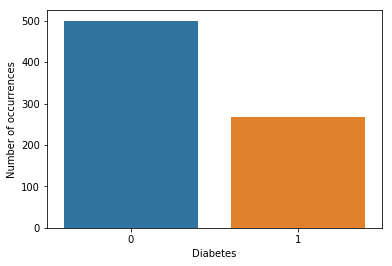

In [12]:
#该问题为分类问题，类别型特征直方图可用countplot
sns.countplot(train['Target'])
plt.xlabel('Diabetes')
plt.ylabel('Number of occurrences')

### 怀孕次数pregnants

Text(0, 0.5, 'Number of occurrences')

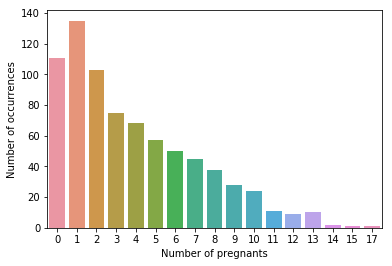

In [13]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train['pregnants'])
plt.xlabel('Number of pregnants')
plt.ylabel('Number of occurrences')


#怀孕次数有超过17的？
#但在疾病判断案例中，异常值可能就意味着得病，不能删除
ulimit = 10

#删除怀孕次数大于10的样本
train = train[train['pregnants'] < ulimit]
print (train.shape)

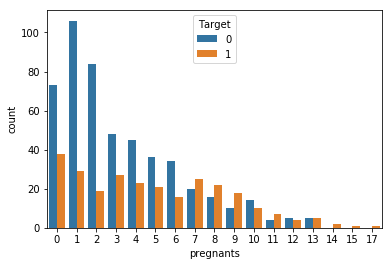

In [14]:
sns.countplot(x="pregnants", hue="Target",data=train)

怀孕次数和是否得病好像还真有关系！！！

### Plasma_glucose_concentration
血浆葡萄糖浓度

Text(0, 0.5, 'Number of occurrences')

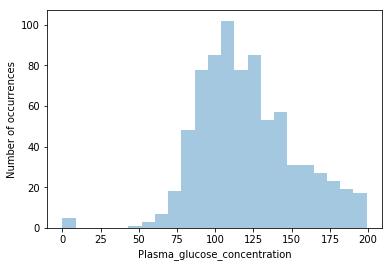

In [15]:
fig = plt.figure()
sns.distplot(train.Plasma_glucose_concentration, kde = False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of occurrences')

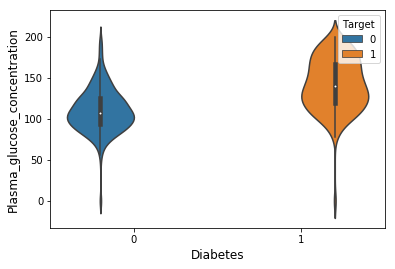

In [16]:
sns.violinplot(x='Target', y='Plasma_glucose_concentration', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

### blood_pressure

Text(0, 0.5, 'frequency')

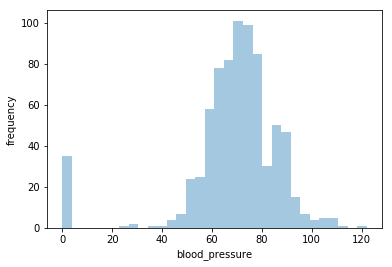

In [17]:
fig = plt.figure()
sns.distplot(train.blood_pressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')

血压为0？

查看blood_pressure与标签之间的关系

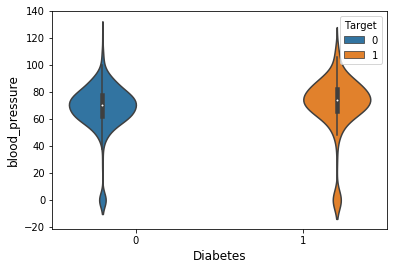

In [18]:
sns.violinplot(x='Target', y='blood_pressure', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('blood_pressure', fontsize=12)
plt.show()

### Triceps_skin_fold_thickness
三头肌皮褶厚度（单位：mm）

Text(0, 0.5, 'frequency')

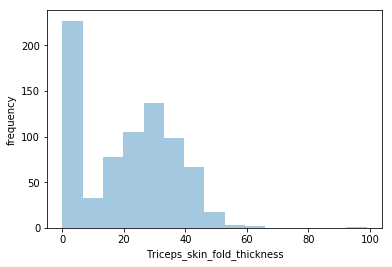

In [19]:
fig = plt.figure()
sns.distplot(train.Triceps_skin_fold_thickness, kde = False)
plt.xlabel('Triceps_skin_fold_thickness')
plt.ylabel('frequency')

Looks like there are some outliers in this feature. So let us remove them and then plot again.
但在疾病判断案例中，异常值可能就意味着得病，不能删除

ulimit = 80
train = train[train['Triceps_skin_fold_thickness'] < ulimit]

plt.scatter(range(train.shape[0]), train["Triceps_skin_fold_thickness"].values,color='purple')
plt.title("Distribution of Triceps_skin_fold_thickness")

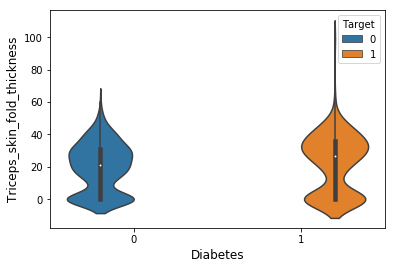

In [20]:
sns.violinplot(x='Target', y='Triceps_skin_fold_thickness', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Triceps_skin_fold_thickness', fontsize=12)
plt.show()

### serum_insulin
餐后血清胰岛素（单位:mm）

Text(0, 0.5, 'frequency')

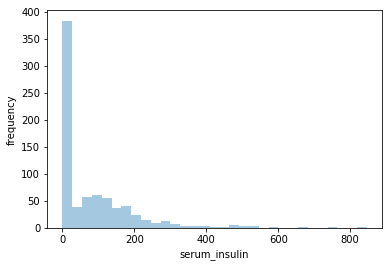

In [21]:
fig = plt.figure()
sns.distplot(train.serum_insulin, kde = False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')

serum_insulin与标签之间的关系

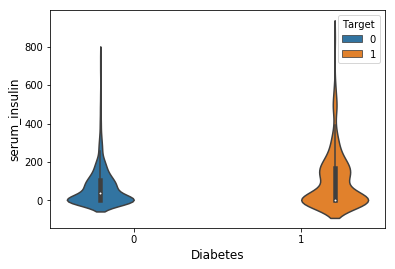

In [22]:
sns.violinplot(x='Target', y='serum_insulin', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('serum_insulin', fontsize=12)
plt.show()

### BMI
体重指数（体重（公斤）/ 身高（米）^2）

Text(0, 0.5, 'frequency')

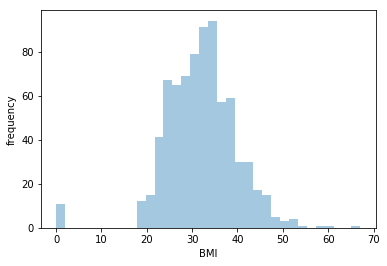

In [23]:
fig = plt.figure()
sns.distplot(train.BMI, kde = False)
plt.xlabel('BMI')
plt.ylabel('frequency')

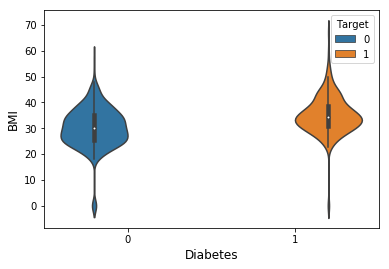

In [24]:
sns.violinplot(x='Target', y='BMI', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

BMI=0？
为缺失值

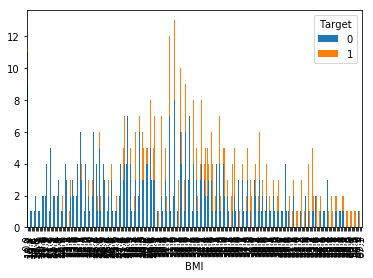

In [25]:
BMIDF = train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0)
BMIDF[[0,1]].plot(kind='bar', stacked=True)

### Diabetes_pedigree_function，糖尿病家系作用

Text(0, 0.5, 'frequency')

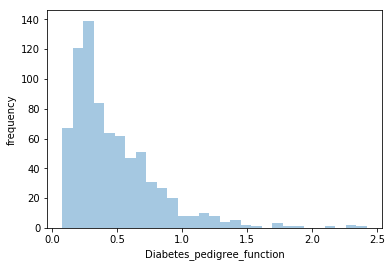

In [26]:
###Diabetes_pedigree_function，糖尿病家系作用
fig = plt.figure()
sns.distplot(train.Diabetes_pedigree_function, kde = False)
plt.xlabel('Diabetes_pedigree_function')
plt.ylabel('frequency')

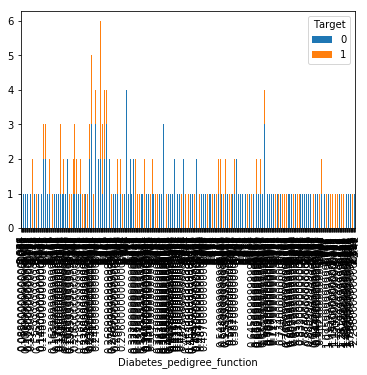

In [27]:
DF = train.groupby(['Diabetes_pedigree_function', 'Target'])['Diabetes_pedigree_function'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

### Age

Text(0, 0.5, 'frequency')

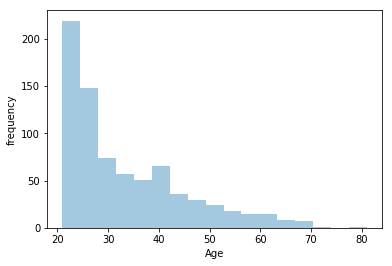

In [28]:
fig = plt.figure()
sns.distplot(train.Age, kde = False)
plt.xlabel('Age')
plt.ylabel('frequency')

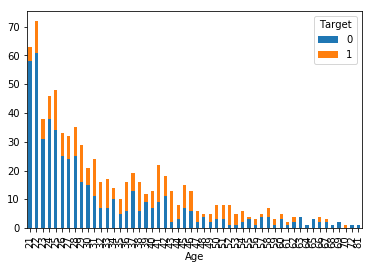

In [29]:
DF = train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

## 特征之间的相关性

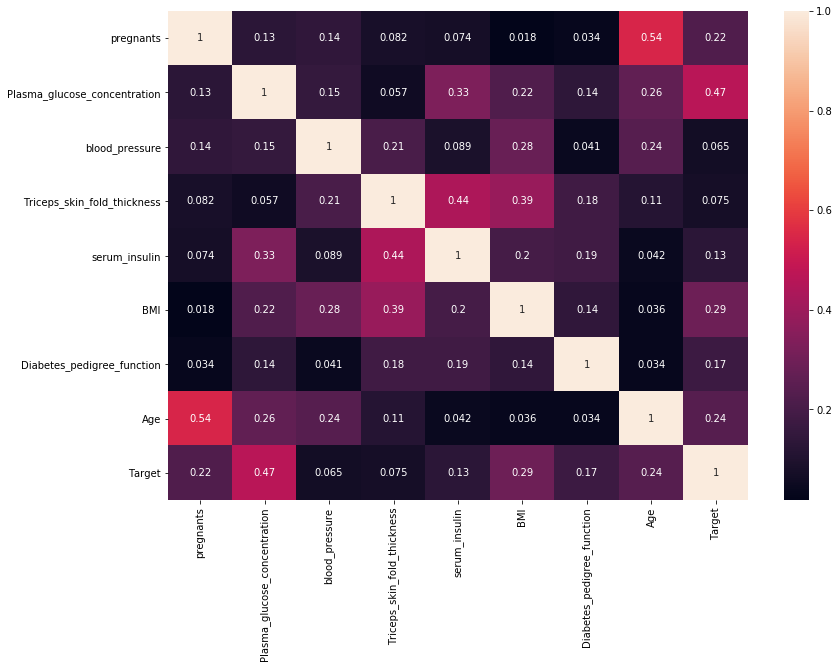

In [30]:
data_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

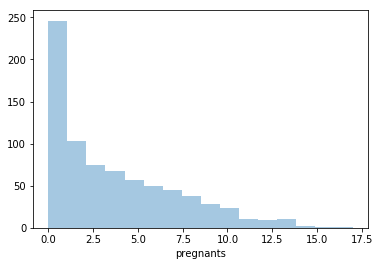

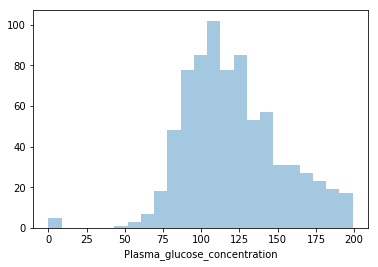

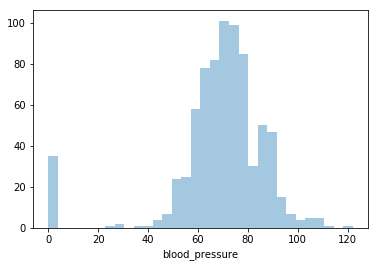

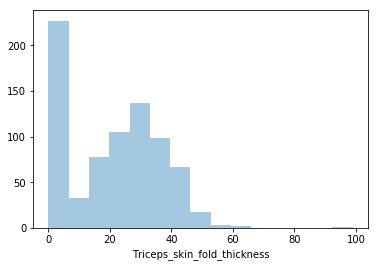

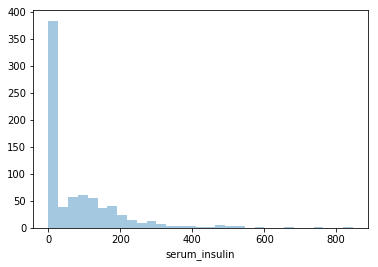

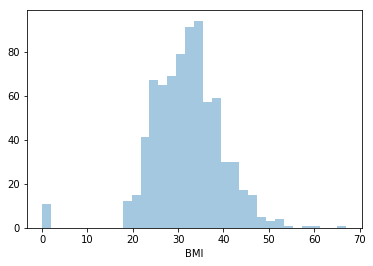

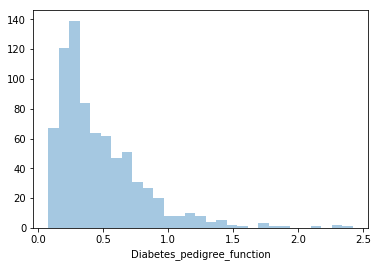

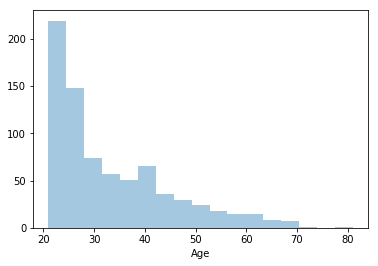

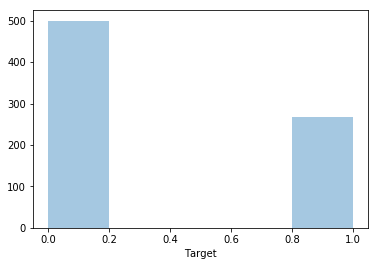

In [31]:
for feature in train.columns:
    sns.distplot(train[feature],kde = False)
    plt.show()